In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from model_tools import load_dataset, load_valset
import time

In [3]:

import matplotlib.pyplot as plt

In [4]:
Model_Name = 'full_conv4_2'

In [5]:
trained_model = keras.models.load_model('saved_model/'+Model_Name)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [6]:
val_ds = load_valset('val_image',10)
test_ds = load_dataset('test_image',10)

In [7]:
img_batch, mask_batch = list(val_ds.take(1).as_numpy_iterator())[0]
print(img_batch.shape)
print(mask_batch.shape)

(32, 200, 200, 3)
(32, 100, 100)


In [8]:
st = time.time()
predict_batch = trained_model(img_batch)
print('took:{}'.format(time.time()-st))

took:10.895516157150269


In [9]:
print(predict_batch.shape)

(32, 100, 100)


In [10]:
import numpy as np

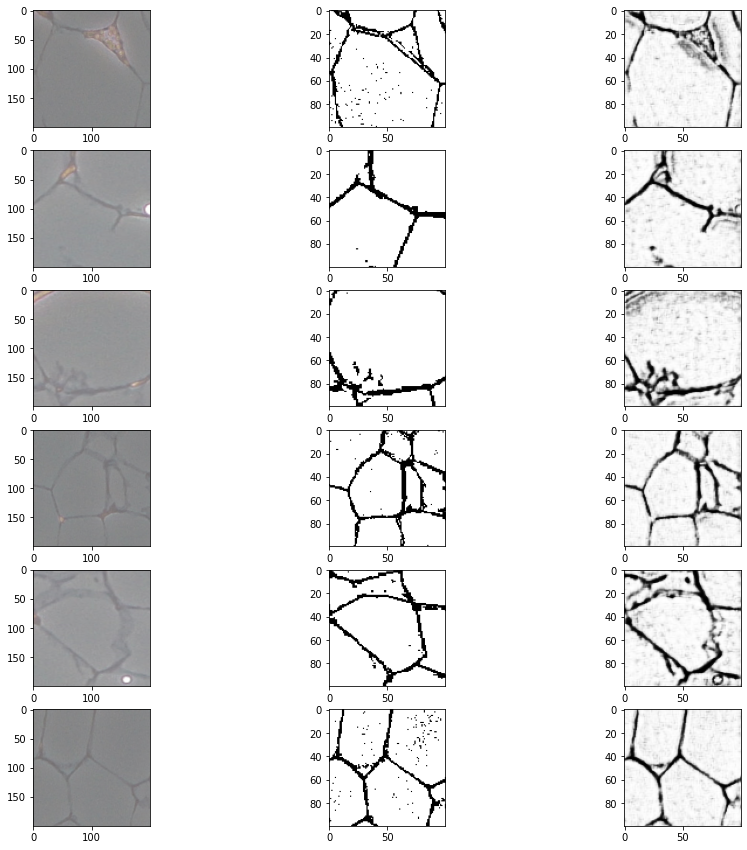

In [14]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
for img, mask, pred in zip(img_batch[:n],mask_batch[:n],predict_batch[:n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred, cmap='binary')
    i += 3
plt.show()

In [15]:
print(predict_batch[0][0])
print(np.min(predict_batch[0]))
print(np.max(predict_batch[0]))

tf.Tensor(
[0.11377639 0.10706346 0.24508502 0.5281684  0.55012405 0.4399278
 0.51561993 0.38751647 0.19961986 0.14547919 0.17203271 0.18344729
 0.12984344 0.27727723 0.5794599  0.5598917  0.33372033 0.16817278
 0.07992552 0.09568694 0.11104825 0.14866412 0.15241033 0.12231338
 0.10447732 0.10176785 0.08540367 0.09501305 0.08434179 0.0921962
 0.1377643  0.09877259 0.08803312 0.07821887 0.06693421 0.07329728
 0.07356305 0.08434179 0.09434342 0.10429472 0.10706346 0.08374041
 0.07396338 0.08225395 0.06572466 0.06730107 0.10837755 0.12453207
 0.12023208 0.09501305 0.0770997  0.07423137 0.06187599 0.08166611
 0.08434179 0.09894659 0.09301681 0.09384396 0.06548521 0.09670579
 0.09501305 0.08601589 0.08269734 0.08866236 0.11397347 0.13591877
 0.16954333 0.11318691 0.06198946 0.06052939 0.12241825 0.14511536
 0.35097733 0.49472064 0.25109637 0.10052487 0.04232459 0.04707417
 0.06717858 0.07030385 0.08464396 0.08525123 0.10105591 0.11556087
 0.08570927 0.09203286 0.07463504 0.07558479 0.076683

In [13]:
print(img_batch[0][0])
print(np.min(img_batch[0]))
print(np.max(img_batch[0]))

[[0.63529414 0.61960787 0.62352943]
 [0.6627451  0.6313726  0.64705884]
 [0.5647059  0.5568628  0.5411765 ]
 [0.5254902  0.5019608  0.4862745 ]
 [0.5058824  0.47058824 0.45882353]
 [0.49411765 0.45490196 0.44313726]
 [0.52156866 0.4862745  0.47843137]
 [0.5372549  0.49803922 0.49019608]
 [0.5294118  0.49019608 0.48235294]
 [0.53333336 0.5019608  0.48235294]
 [0.5568628  0.5019608  0.49411765]
 [0.5372549  0.49019608 0.4745098 ]
 [0.5058824  0.45490196 0.42745098]
 [0.52156866 0.4627451  0.43529412]
 [0.57254905 0.5019608  0.4745098 ]
 [0.5882353  0.5372549  0.4862745 ]
 [0.6156863  0.57254905 0.5294118 ]
 [0.67058825 0.6156863  0.58431375]
 [0.6862745  0.63529414 0.60784316]
 [0.67058825 0.6156863  0.6039216 ]
 [0.63529414 0.5764706  0.5764706 ]
 [0.6117647  0.56078434 0.5803922 ]
 [0.5921569  0.56078434 0.5764706 ]
 [0.5921569  0.5568628  0.5882353 ]
 [0.6156863  0.5764706  0.60784316]
 [0.6313726  0.5921569  0.6156863 ]
 [0.5764706  0.5372549  0.57254905]
 [0.5058824  0.46666667 0.50